In [13]:
# Show plots inline
%matplotlib inline

#%% 3-rd party libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
#%% Defined functions

def missing_data_by_cols(df):
    """
    Returns a pandas data frame with the columns and the percentage of missing data for each column.
    """
    missing = 100 - np.array([df[c].notnull().sum()*100.0 / df.shape[0] for c in df.columns])
    return pd.DataFrame({'Column':df.columns, 'Missing %':missing})

In [15]:
#%% Read the data

df = pd.read_csv('data_bike_rental_day.csv')
df.index = df['dteday']

print df.dtypes
print missing_data_by_cols(df)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object
        Column  Missing %
0      instant          0
1       dteday          0
2       season          0
3           yr          0
4         mnth          0
5      holiday          0
6      weekday          0
7   workingday          0
8   weathersit          0
9         temp          0
10       atemp          0
11         hum          0
12   windspeed          0
13      casual          0
14  registered          0
15         cnt          0


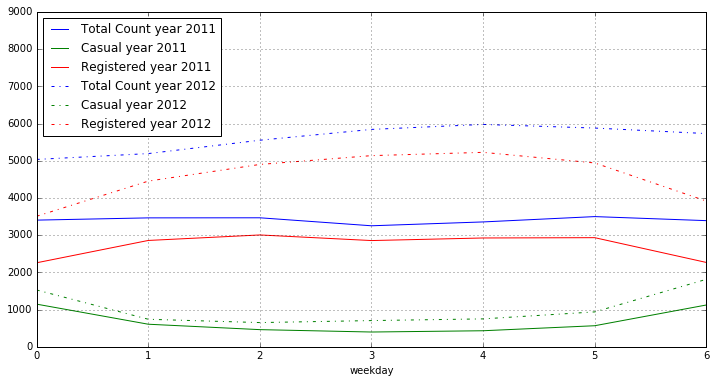

In [16]:
#%% Aggregate the data

grouped = df.groupby('yr')
year0 = grouped.get_group(0)
year1 = grouped.get_group(1)

fig, ax = plt.subplots(figsize=(12,6))
for i,dataset in enumerate((year0, year1)):
    weekday_aggregated = dataset.groupby('weekday').agg({'cnt':'mean',
                                                        'casual':'mean',
                                                        'registered':'mean'})
    ls = '-' if i == 0 else '-.'
    weekday_aggregated['cnt'].plot(color='b', ax=ax, label='Total Count year '+str(2011+i), ls=ls)
    weekday_aggregated['casual'].plot(color='g', ax=ax, label='Casual year '+str(2011+i), ls=ls)
    weekday_aggregated['registered'].plot(color='r', ax=ax, label='Registered year '+str(2011+i), ls=ls)
    ax.grid(True)
    ax.legend(loc='best')
ax = ax.set_ylim(0,9000)